### Galaxy environment

Some methods to test galaxy environment

In [130]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import numpy as np

import pickle

import astroquery.vizier as vizier
import astroquery.ned  as ned

import astropy.units as u
import astropy.coordinates as coord

%matplotlib inline

## directory
rootdir = "/home/stephane/Science/Galaxies"
wdir    = "%s/products"%(rootdir)

import sys, os
sys.path.append("%s/master/notebooks"%(rootdir))

os.chdir(wdir)

## Settings
ROW_LIMIT = 5000
vizier.Vizier.ROW_LIMIT = ROW_LIMIT

In [131]:
def get_2mass(source, conesize = 0.5):
    "Get the 2MASS data from Vizier"
    
    c = coord.SkyCoord(ra=source[0]*u.deg, dec=source[1]*u.deg)
    cat = "II/246" ## 2MASS ps
    cat = "II/233" ## Ext 2MASS
    cat = "II/312/ais"
    # cat = "VIII/65"
    res = vizier.Vizier.query_region(c , radius=conesize*u.arcmin,catalog=cat)
    # res = ned.Ned.query_region(c , radius=conesize*u.arcmin)
    
    try:
        if len(res[0]) == ROW_LIMIT :
            print("### Number limit of objects reached...")
    except:
        print("## No source found ...")
        
    
    return(res)

In [132]:
def plot_field(tm ,s ,sexag = False):
    "plot the sources in the field"
    
    ral  = []
    decl = []
    if sexag:
        for val1, val2  in zip(tm['RAJ2000'],tm['DEJ2000']) :
            ra  = coord.Angle(val1, unit='hourangle')
            dec = coord.Angle(val2, unit=u.deg)
            ral.append(ra.degree)
            decl.append(dec.degree)
    else :
        for val1, val2  in zip(tm['RAJ2000'],tm['DEJ2000']) :
            ral.append(val1)
            decl.append(val2)
        
    fig = plt.figure(figsize=(10, 10))
    plt.plot(ral,decl, "k*")
    plt.plot(s[0], s[1], "r+")
    plt.grid("on")
    plt.show()

## Getting the sources  ...


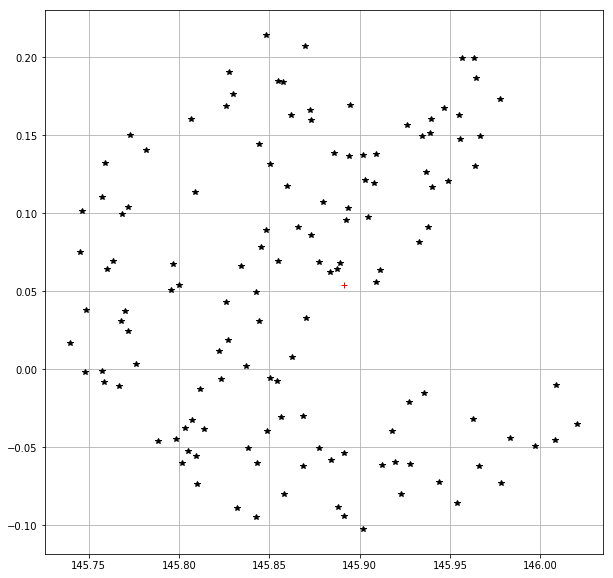

In [133]:
### Main

## 
s = [145.891068, 0.05370]

print("## Getting the sources  ...")
tm = get_2mass(s, conesize =10.0)

if len(tm)> 0:
    plot_field(tm[0], s , sexag = False)